## Q1 Linear Regression Analysis for Wine Quality

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pip
pip._internal.main(['install', 'mlxtend'])
#### for logistic
import statsmodels.api as sm
from scipy import stats
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#### for apriori
from mlxtend.preprocessing import TransactionEncoder
import csv
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


#### 導入資料與觀察資料集

In [3]:
furnance = pd.read_csv("MDS_Assignment1_furnace.csv")
furnance.head()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.26425,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.26425,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.26425,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2


In [4]:
fur_x = furnance.drop(["grade"], axis=1)
fur_y = furnance["grade"]
fur_y

0      2
1      4
2      2
3      2
4      2
      ..
615    2
616    2
617    2
618    2
619    2
Name: grade, Length: 620, dtype: int64

In [5]:
fur_x = sm.add_constant(fur_x)
fur_est = sm.OLS(fur_y, fur_x)
fur_est = fur_est.fit()
print(fur_est.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Wed, 20 Oct 2021   Prob (F-statistic):           1.16e-70
Time:                        20:57:32   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0339      0.018    110.528      0.0

#### Q1-b The fitting of the linear regression is a good idea? 
ANS :  
R-square : 0.495 / Adjusted R square : 0.472  
R-square 介在 0.3~0.5 之間，是相較弱的。從此題的R-square可以看出，線性回歸並不是最佳的方法。大部分的數據無法完美的預測實際情況。  
可能會呈現下圖output1的樣子  
![截圖 2021-10-18 下午2.05.02.png](https://miro.medium.com/max/1400/1*rPfgVkqGYUVlQgwGIQ0Y5Q.png)  
圖片來源：https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2F%40erika.dauria%2Flooking-at-r-squared-721252709098&psig=AOvVaw2vYUdRGTZbtmBpNpE067XV&ust=1634623603314000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCPjmt82l0_MCFQAAAAAdAAAAABAD
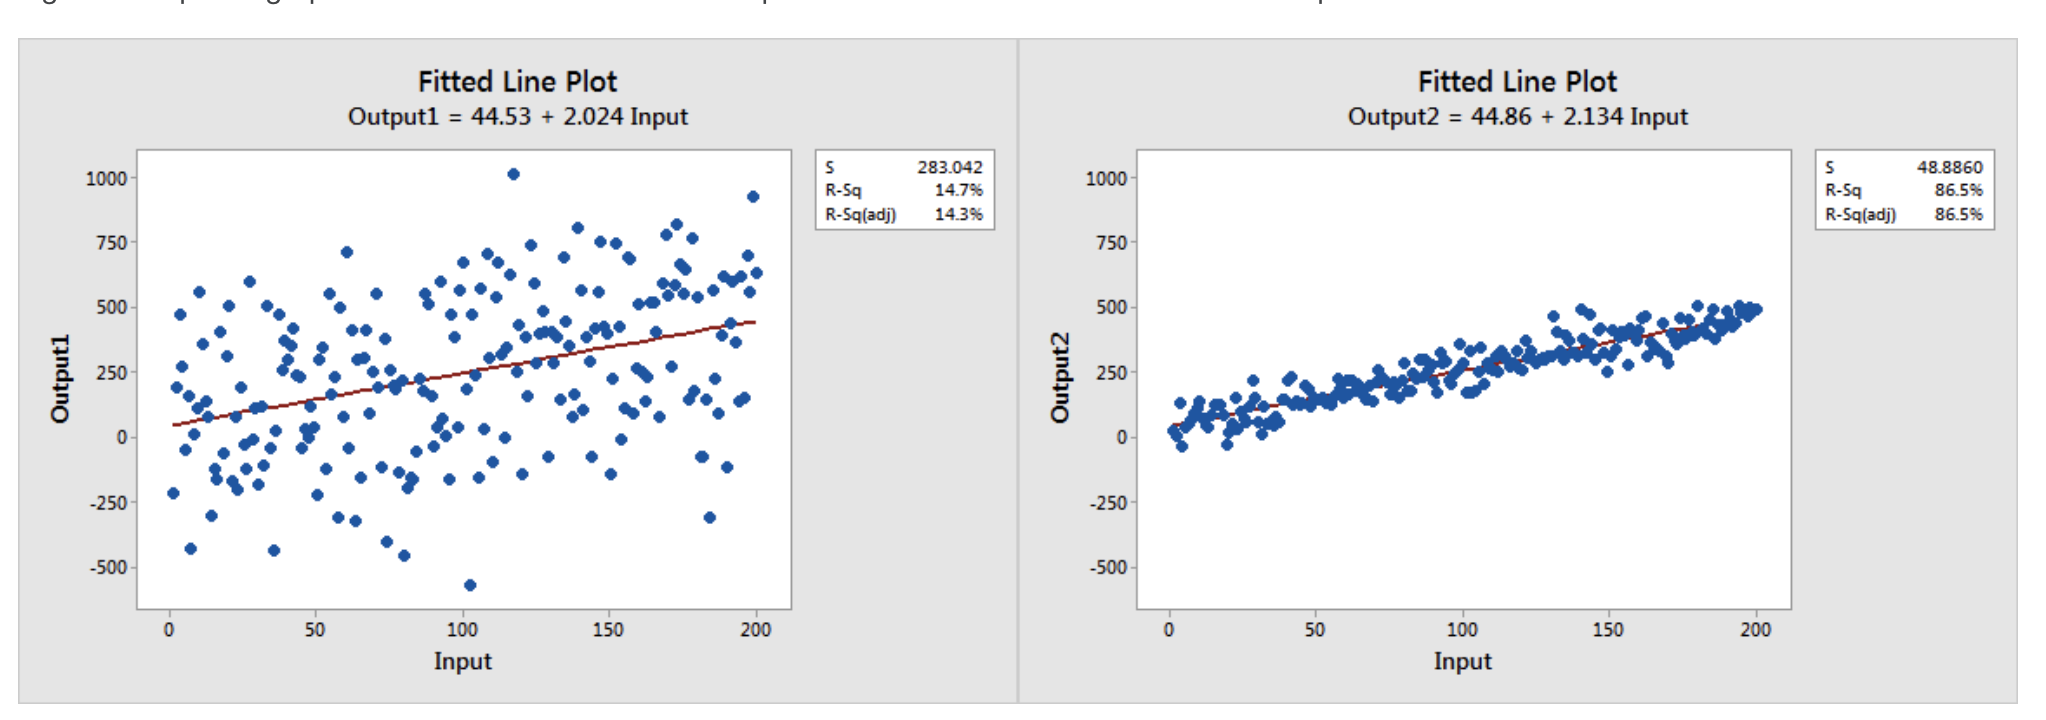

#### Q1-c Rank the independent variables by p-values 
* Which one are statistically significant variables with p-values<0.01? (i.e. 重要變數挑選)  
ANS: 從p-value那一行可以挑出 < 0.01 的值有：f2, f5, f6, f8, f10, f14, f15, f17, f18, f22, f25 為重要變數。

#### Q1-d Testify the underlying assumptions of regression 
* Normality
* Independence
* Homogeneity of Variance with respect to residual

##### （1）常態性假設（Normality）
* shapiro.test 函式可以用來檢驗殘差的常態性：

In [6]:
#### 找出殘差值
fur_est.resid
shapiro_test = stats.shapiro(fur_est.resid)
shapiro_test

(0.9345124363899231, 7.536043131996446e-16)

ANS : 由於虛無假設 H0: 殘差服從常態分配，因為p-value < 0.05，代表有足夠的證據拒絕H0，故可能違反了殘差對於常態性的假設。

##### (2) 獨立性假設 (Independence)
* 要檢驗殘差的獨立性，可以使用 Durbin-Watson Test

In [7]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fur_est.resid)

2.0040534804722108

ANS : No autocorrelation , 以準則來看殘差具獨立性

##### (3) 變異數同質性假設 （Homogeneity of Variance with respect to residual）
* 要檢驗殘差的變異數同質性，可以使用 Breusch–Pagan test

In [8]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['Lagrange multiplier statistic', 'p-value', 
        'f-value', 'f p-value']
test = sms.het_breuschpagan(fur_est.resid, fur_est.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 140.62034965182627),
 ('p-value', 5.87184293010542e-17),
 ('f-value', 6.43171099963128),
 ('f p-value', 5.3118156753530166e-20)]

ANS : p value 小於 0.05 代表這些殘差不具有同質性。顯示我們的線秀魔行可能有一些問題。如 R-square一樣，顯示可能不適合。

## Q2  Data Preprocessing and Generalized Linear Model (GLM)/Logistic Regression

#### 導入資料

In [9]:
census = pd.read_csv("MDS_Assignment1_census.csv",names=['age','workclass', 'fnlwgt','education','education-num'\
                                                         ,'marital-status','occupation','relationship','race'\
                                                         ,'sex','capital-gain: continuous','capital-loss'\
                                                         ,'hours-per-week','native-country','Class'])
census.replace(to_replace=[' ?'], value=np.nan, inplace=True)
cen_x = census.drop(["Class"], axis=1)
cen_y = census["Class"]

In [10]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain: continuous,capital-loss,hours-per-week,native-country,Class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Q2-1 / Q2-2 Provide the descriptive statistics. / How?
* First, provide the mean,variance and distributions
* Second, provide number of the missing value and outliers

In [11]:
census.describe()

,age,fnlwgt,education-num,capital-gain: continuous,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
#### # of missing val
"""要先將 ? 轉成 np.nan 而且都差一個空格，要注意"""
census.isnull().sum()

age                            0
workclass                   1836
fnlwgt                         0
education                      0
education-num                  0
marital-status                 0
occupation                  1843
relationship                   0
race                           0
sex                            0
capital-gain: continuous       0
capital-loss                   0
hours-per-week                 0
native-country               583
Class                          0
dtype: int64

In [13]:
#### number of outliers
Q1 = census.quantile(0.25)
Q3 = census.quantile(0.75)
IQR = Q3 - Q1
((census < (Q1 - 1.5 * IQR)) | (census > (Q3 + 1.5 * IQR))).sum()

NumExpr defaulting to 4 threads.


Class                          0
age                          143
capital-gain: continuous    2712
capital-loss                1519
education                      0
education-num               1198
fnlwgt                       992
hours-per-week              9008
marital-status                 0
native-country                 0
occupation                     0
race                           0
relationship                   0
sex                            0
workclass                      0
dtype: int64

#### Q2-3 How to transform the categorical variable to dummy variable?

In [14]:
cen_x = pd.get_dummies(cen_x, drop_first=True)
cen_x

,age,fnlwgt,education-num,capital-gain: continuous,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,40,154374,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,58,151910,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,22,201490,9,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


#### Q2-4 How to “randomly” split the dataset into training dataset and testing dataset 
* 使用 sklearn.model_selection 中的 train_test_split 來進行 train test 分割

In [15]:
cen_x_train, cen_x_test, cen_y_train, cen_y_test = train_test_split(cen_x, cen_y, test_size=0.2, random_state=42)

#### 要標準化
scaler = StandardScaler()
scaler.fit(cen_x_train)
cen_x_train_std = scaler.transform(cen_x_train)
cen_x_test_std = scaler.transform(cen_x_test)

#### Q2-5  Generalized Linear Model (GLM) (OR Logistic Regression) 
* 使用 sklearn 套件中的 logistic regression 演算法進行分類器訓練

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
cen_log = LogisticRegression(penalty='l2').fit(cen_x_train_std, cen_y_train.values.ravel())
cen_predict = cen_log.predict(cen_x_test_std)

#### 輸出前10筆資料
cen_predict[:10]

array([' <=50K', ' <=50K', ' >50K', ' <=50K', ' <=50K', ' >50K', ' >50K',
       ' <=50K', ' <=50K', ' >50K'], dtype=object)

## Q3 Association Rule- Market Basket Analysis

#### Q3-1  How to handle the raw dataset via data preprocessing?
* Use “association rule” to find the potential patterns which satisfy the following criterion:
    * Set the minimum support to 0.001
    * Set the minimum confidence of 0.15

In [3]:
grocery = pd.read_csv("MDS_Assignment1_groceries.csv",names=[' col 1 ',' col 2 ',' col 3 ',' col 4 ',' col 5 '\
                                                                             ,' col 6 ',' col 7 ',' col 8 ',' col 9 ',' col 10 '\
                                                                             ,' col 11 ',' col 12 ',' col 13 ',' col 14 ',' col 15 '\
                                                                             ,' col 16 ',' col 17 ',' col 18 ',' col 19 ',' col 20 '\
                                                                             ,' col 21 ',' col 22 ',' col 23 ',' col 24 ',' col 25 '\
                                                                             ,' col 26 ',' col 27 ',' col 28 ',' col 29 ',' col 30 '\
                                                                             ,' col 31 ',' col 32 '])


In [4]:
grocery.head()

,col 1,col 2,col 3,col 4,col 5,col 6,col 7,col 8,col 9,col 10,...,col 23,col 24,col 25,col 26,col 27,col 28,col 29,col 30,col 31,col 32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
grocery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0    col 1    9835 non-null   object
 1    col 2    7676 non-null   object
 2    col 3    6033 non-null   object
 3    col 4    4734 non-null   object
 4    col 5    3729 non-null   object
 5    col 6    2874 non-null   object
 6    col 7    2229 non-null   object
 7    col 8    1684 non-null   object
 8    col 9    1246 non-null   object
 9    col 10   896 non-null    object
 10   col 11   650 non-null    object
 11   col 12   468 non-null    object
 12   col 13   351 non-null    object
 13   col 14   273 non-null    object
 14   col 15   196 non-null    object
 15   col 16   141 non-null    object
 16   col 17   95 non-null     object
 17   col 18   66 non-null     object
 18   col 19   52 non-null     object
 19   col 20   38 non-null     object
 20   col 21   29 non-null     object
 21   col 22   18 n

In [6]:
grocery.shape

(9835, 32)

#### 資料處理
* 依品名採計購買數量

In [7]:
##### 重新製作一個陣列
w, h = 169, 9835
Matrix = [[0 for x in range(w)] for y in range(h)] 
new_df = pd.DataFrame(Matrix)
new_df = new_df.set_axis(['citrus fruit','tropical fruit','whole milk','pip fruit',\
               'other vegetables','rolls/buns','pot plants','beef','frankfurter',\
                'chicken','butter','fruit/vegetable juice','packaged fruit/vegetables',\
                'chocolate','specialty bar','butter milk','bottled water','yogurt','sausage',\
                'brown bread','hamburger meat','root vegetables','pork','pastry','canned beer',\
                'berries','coffee','misc. beverages','ham','turkey','curd cheese','red/blush wine',\
                'frozen potato products','flour','sugar','frozen meals','herbs','soda','detergent',\
                'grapes','processed cheese','fish','sparkling wine','newspapers','curd','pasta',\
                'popcorn','finished products','beverages','bottled beer','dessert','dog food',\
                'specialty chocolate','condensed milk','cleaner','white wine','meat','ice cream',\
                'hard cheese','cream cheese ','liquor','pickled vegetables','liquor (appetizer)',\
                'UHT-milk','candy','onions','hair spray','photo/film','domestic eggs','margarine',\
                'shopping bags','salt','oil','whipped/sour cream','frozen vegetables','sliced cheese',\
                'dish cleaner','baking powder','specialty cheese','salty snack','Instant food products',\
                'pet care','white bread','female sanitary products','cling film/bags','soap',\
                'frozen chicken','house keeping products','spread cheese','decalcifier','frozen dessert',\
                'vinegar','nuts/prunes','potato products','frozen fish','hygiene articles',\
                'artif. sweetener','light bulbs','canned vegetables','chewing gum','canned fish',\
                'cookware','semi-finished bread','cat food','bathroom cleaner','prosecco','liver loaf',\
                'zwieback','canned fruit','frozen fruits','brandy','baby cosmetics','spices',\
                'napkins','waffles','sauces','rum','chocolate marshmallow','long life bakery product',\
                'bags','sweet spreads','soups','mustard','specialty fat','instant coffee',\
                'snack products','organic sausage','soft cheese','mayonnaise','dental care',\
                'roll products ','kitchen towels','flower soil/fertilizer','cereals','meat spreads',\
                'dishes','male cosmetics','candles','whisky','tidbits','cooking chocolate',\
                'seasonal products','liqueur','abrasive cleaner','syrup','ketchup','cream','skin care',\
                'rubbing alcohol','nut snack','cocoa drinks','softener','organic products','cake bar',\
                'honey','jam','kitchen utensil','flower (seeds)','rice','tea','salad dressing',\
                'specialty vegetables','pudding powder','ready soups','make up remover',\
                'toilet cleaner','preservation products','sound storage medium','baby food'], axis=1, inplace=False)
new_df

,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,beef,frankfurter,chicken,...,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products,sound storage medium,baby food
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
for i in range(9385):
    for j in grocery.loc[i]:
        if(j != 'nan'):
            new_df.loc[i,j]=1
        else:
            new_df.loc[i,j]=0
new_df

,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,beef,frankfurter,chicken,...,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products,sound storage medium,baby food,NaN
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1.0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN


In [9]:
new_df = new_df.iloc[: , :-1]
new_df

,citrus fruit,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,beef,frankfurter,chicken,...,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products,sound storage medium,baby food
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
new_df.shape

(9835, 169)

In [ ]:
#### 開始分析
groc_supp = apriori(new_df, min_support=0.001,use_colnames=True)
groc_supp.head()